In [1]:
# Import all the necessory libraries
import os
import re
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
nltk.download("wordnet")
from nltk.stem import *
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.exceptions import ConvergenceWarning
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

from sklearn import linear_model
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, auc, mean_absolute_error
from sklearn.model_selection import GridSearchCV, KFold
# from sklearn.cross_validation import KFold # old version

from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

cur_dir = os.getcwd()

import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leeyu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\leeyu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# To view the whole dataframe when analysing needed features 
# pd.set_option('display.max_rows', 10)
# pd.set_option('display.max_columns', 10)
# pd.reset_option('all')

# 1. Data Cleaning 
After imported the data, useless data is needed to be reoved from the dataframe. WE first daeal with the missing data ans then delete the dats that are rarly appears, which increased the variancy of the model. 

### Import the Data

In [3]:
# Import the data to dataframe 
salaryDf = pd.read_csv('Kaggle_Salary.csv', encoding = 'UTF-8', low_memory=False) #, header=[0,1]

In [4]:
salaryDf.head()

,Unnamed: 0,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,...,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT,index
0,0,Duration (in seconds),What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,What is your age (# years)?,In which country do you currently reside?,What is the highest level of formal education ...,Which best describes your undergraduate major?...,Select the title most similar to your current ...,Select the title most similar to your current ...,...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,What barriers prevent you from making your wor...,NaN
1,2,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0.0
2,3,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,...,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1,1.0
3,5,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,...,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1,2.0
4,7,959,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,...,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN,-1,3.0


### Missing Values 
By analysing the nans in the surveies, we noticed that after Q9, the answers becomes too sparse, and the questions are harder to answer. Thereofore, by getting rid of these features, here we have an much cleaner model to analysis and the analsysis results should bw making mire sense in this case. 



In [5]:
salaryDf.isna().sum()

Unnamed: 0                                 0
Time from Start to Finish (seconds)        0
Q1                                         0
Q1_OTHER_TEXT                              0
Q2                                         0
Q3                                         0
Q4                                         0
Q5                                       135
Q6                                         0
Q6_OTHER_TEXT                              0
Q7                                         0
Q7_OTHER_TEXT                              0
Q8                                        76
Q9                                         0
Q10                                      292
Q11_Part_1                              7966
Q11_Part_2                             11186
Q11_Part_3                             11278
Q11_Part_4                              9705
Q11_Part_5                             11845
Q11_Part_6                             12914
Q11_Part_7                             14758
Q11_OTHER_

In [4]:
salaryDff = salaryDf.iloc[:,2:14]

In [5]:
salaryDfff = salaryDff[1:]

In [6]:
Q = salaryDff.iloc[0]
Q.values

array(['What is your gender? - Selected Choice',
       'What is your gender? - Prefer to self-describe - Text',
       'What is your age (# years)?',
       'In which country do you currently reside?',
       'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
       'Which best describes your undergraduate major? - Selected Choice',
       'Select the title most similar to your current role (or most recent title if retired): - Selected Choice',
       'Select the title most similar to your current role (or most recent title if retired): - Other - Text',
       'In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice',
       'In what industry is your current employer/contract (or your most recent employer if retired)? - Other - Text',
       'How many years of experience do you have in your current role?',
       'What is your current yearly compensation (approximate

In [7]:
salaryDfff.head()

,Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,Q7_OTHER_TEXT,Q8,Q9
1,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,-1,5-10,18668
2,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,-1,0-1,2726
3,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,-1,0-1,682
4,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,Academics/Education,-1,10-15,11957
5,Male,-1,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,2,Other,1,0-1,2696


In [8]:
# Clean the other_type columns 
salaryDfff = salaryDfff.drop(['Q1_OTHER_TEXT','Q6_OTHER_TEXT', 'Q7_OTHER_TEXT'],axis=1)

In [9]:
# Rename the Info in each column instead of using the question number 
salaryDfff.columns = ['Gender','Age','Country','Degree','Specilization','Job','Industry','Year_of_work', 'Salary']

In [10]:
# Empty cells in the updated dataframe 
salaryDfff.isna().sum()

Gender             0
Age                0
Country            0
Degree             0
Specilization    135
Job                0
Industry           0
Year_of_work      76
Salary             0
dtype: int64

Discover the components in each selected feature, see if there's any too little groups making the model overfitting. 

#### Gender 
For the gender column, there'are two gourps 'prefer not to day', 'prefer to self-describe' which is around 1% in the total data. These two are deleted. 

In [11]:
# Can see that most Contract Types are full-time
salaryDfff['Gender'].value_counts(normalize=True)

Male                       0.833884
Female                     0.154255
Prefer not to say          0.008426
Prefer to self-describe    0.003435
Name: Gender, dtype: float64

In [12]:
# There are very few cases where the title is not provided, therefore these will be simply removed
salaryDfff = salaryDfff[~salaryDfff['Gender'].isin(['Prefer not to say', 'Prefer to self-describe'])]

In [13]:
salaryDfff['Age'].value_counts(normalize=True)

25-29    0.277515
22-24    0.188377
30-34    0.182146
35-39    0.106257
18-21    0.088679
40-44    0.064148
45-49    0.038895
50-54    0.026040
55-59    0.014233
60-69    0.011741
70-79    0.001705
80+      0.000262
Name: Age, dtype: float64

In [14]:
salaryDfff['Degree'].value_counts(normalize=True)

Master’s degree                                                      0.472911
Bachelor’s degree                                                    0.284599
Doctoral degree                                                      0.163649
Some college/university study without earning a bachelor’s degree    0.038174
Professional degree                                                  0.024859
No formal education past high school                                 0.008264
I prefer not to answer                                               0.007543
Name: Degree, dtype: float64

In [15]:
salaryDfff['Specilization'].value_counts(normalize=True)

Computer science (software engineering, etc.)                    0.388757
Engineering (non-computer focused)                               0.161772
Mathematics or statistics                                        0.135714
A business discipline (accounting, economics, finance, etc.)     0.084590
Physics or astronomy                                             0.055026
Information technology, networking, or system administration     0.042130
Medical or life sciences (biology, chemistry, medicine, etc.)    0.039947
Other                                                            0.032341
Social sciences (anthropology, psychology, sociology, etc.)      0.026587
Humanities (history, literature, philosophy, etc.)               0.013690
Environmental science or geology                                 0.011442
I never declared a major                                         0.004365
Fine arts or performing arts                                     0.003638
Name: Specilization, dtype: float64

In [16]:
salaryDfff['Job'].value_counts(normalize=True)

Data Scientist             0.210809
Student                    0.170077
Software Engineer          0.151909
Data Analyst               0.092746
Other                      0.065788
Research Scientist         0.060278
Business Analyst           0.038108
Consultant                 0.037059
Data Engineer              0.036600
Manager                    0.029254
Research Assistant         0.028663
Product/Project Manager    0.021120
Chief Officer              0.016070
Statistician               0.011675
DBA/Database Engineer      0.007543
Marketing Analyst          0.005575
Developer Advocate         0.005575
Principal Investigator     0.005378
Salesperson                0.005116
Data Journalist            0.000656
Name: Job, dtype: float64

## a) Missing Data 

### Q5 Nulls
First, lets deal with the NaNs in our dataset. We'll first start with the NaNs in the speciliations column. Most peopele sicne most of the people in this survey is in the CS insdustry, then we can assume the empty cell data is also in this field. By changing the naN to CS wou'd change the disttrybution of this column either. 

In [17]:
salaryDfff[salaryDfff.Specilization.isnull()]

,Gender,Age,Country,Degree,Specilization,Job,Industry,Year_of_work,Salary
175,Male,25-29,China,No formal education past high school,NaN,Software Engineer,Accounting/Finance,5-10,30550
536,Male,35-39,United Kingdom of Great Britain and Northern I...,No formal education past high school,NaN,Other,Insurance/Risk Assessment,3-4,153986
660,Male,40-44,Czech Republic,No formal education past high school,NaN,Software Engineer,Accounting/Finance,10-15,43813
962,Male,30-34,Belarus,No formal education past high school,NaN,Software Engineer,Computers/Technology,5-10,29820
1057,Male,22-24,Japan,No formal education past high school,NaN,Product/Project Manager,Online Service/Internet-based Services,1-2,18071
1747,Male,30-34,Israel,No formal education past high school,NaN,Software Engineer,Computers/Technology,5-10,119843
1765,Male,18-21,Ukraine,No formal education past high school,NaN,Consultant,Computers/Technology,1-2,2689
1788,Male,35-39,Other,No formal education past high school,NaN,Data Scientist,Accounting/Finance,1-2,55032
2010,Male,35-39,Russia,No formal education past high school,NaN,Data Scientist,Accounting/Finance,0-1,3084
2151,Male,45-49,Canada,No formal education past high school,NaN,Data Analyst,Government/Public Service,15-20,71438


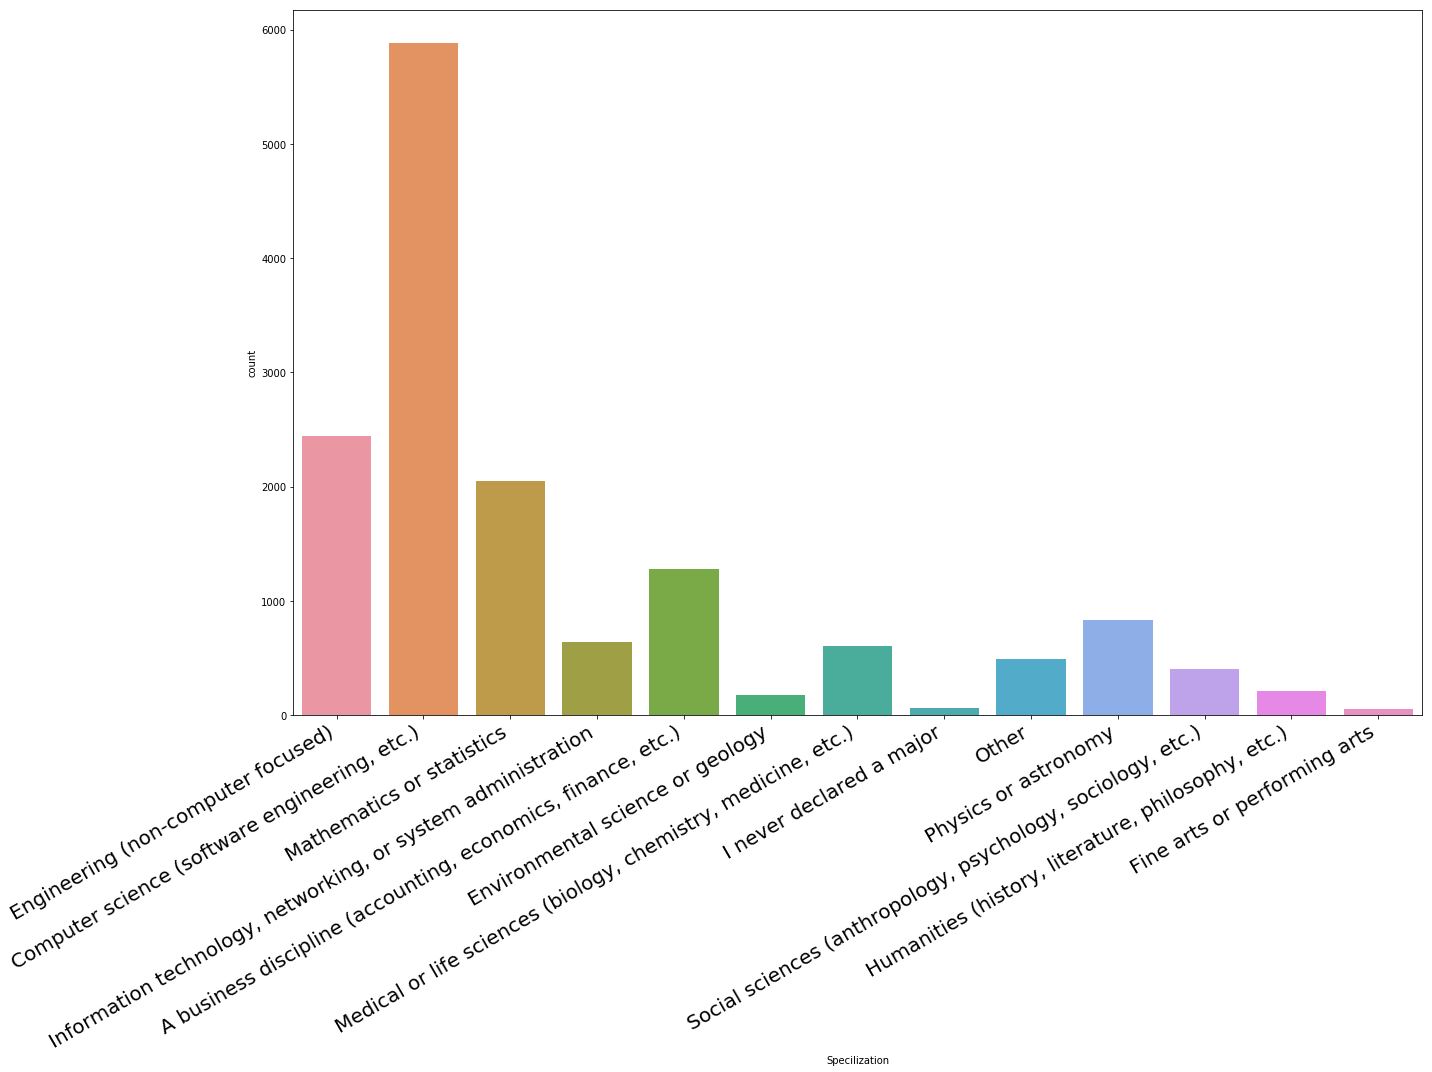

In [18]:
plt.figure(figsize=(20,15))
Q5_plot = sns.countplot(x='Specilization',data=salaryDfff)

Q5_plot.set_xticklabels(Q5_plot.get_xticklabels(), size= 20 ,rotation=30, ha="right")

plt.tight_layout()
plt.show()

Since Computere Science is the most frequent education background in the survey. Then simply assign this education background to the nan in this category. 

In [19]:
# Set Value
salaryDfff = salaryDfff.set_value(salaryDfff['Specilization'].isnull(), 'Specilization','Computer science (software engineering, etc.)')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


### Q8 Null
Next we deal with the seciond most empty cells, as can be seen, most are in the industry for 0-1 years. Then by using the same approcah as previous column, we assume these 76 people are also just entered the busines. 

In [23]:
salaryDfff[salaryDfff.Year_of_work.isnull()]

,Gender,Age,Country,Degree,Specilization,Job,Industry,Year_of_work,Salary
8,Male,25-29,France,Doctoral degree,Mathematics or statistics,Student,I am a student,NaN,38246
244,Male,18-21,India,Master’s degree,Engineering (non-computer focused),Student,I am a student,NaN,2629
361,Male,18-21,India,Bachelor’s degree,"Computer science (software engineering, etc.)",Student,I am a student,NaN,9190
513,Male,25-29,Tunisia,Master’s degree,"Computer science (software engineering, etc.)",Student,I am a student,NaN,2285
636,Male,22-24,India,Master’s degree,"Computer science (software engineering, etc.)",Student,I am a student,NaN,2361
770,Female,22-24,United Kingdom of Great Britain and Northern I...,Doctoral degree,"Medical or life sciences (biology, chemistry, ...",Student,I am a student,NaN,16657
874,Female,18-21,India,Bachelor’s degree,"Medical or life sciences (biology, chemistry, ...",Student,I am a student,NaN,6818
957,Male,18-21,India,Some college/university study without earning ...,"Computer science (software engineering, etc.)",Student,I am a student,NaN,2630
961,Male,50-54,India,Doctoral degree,Engineering (non-computer focused),Data Scientist,Academics/Education,NaN,29302
1114,Female,22-24,"Iran, Islamic Republic of...",Master’s degree,"Computer science (software engineering, etc.)",Student,I am a student,NaN,1825


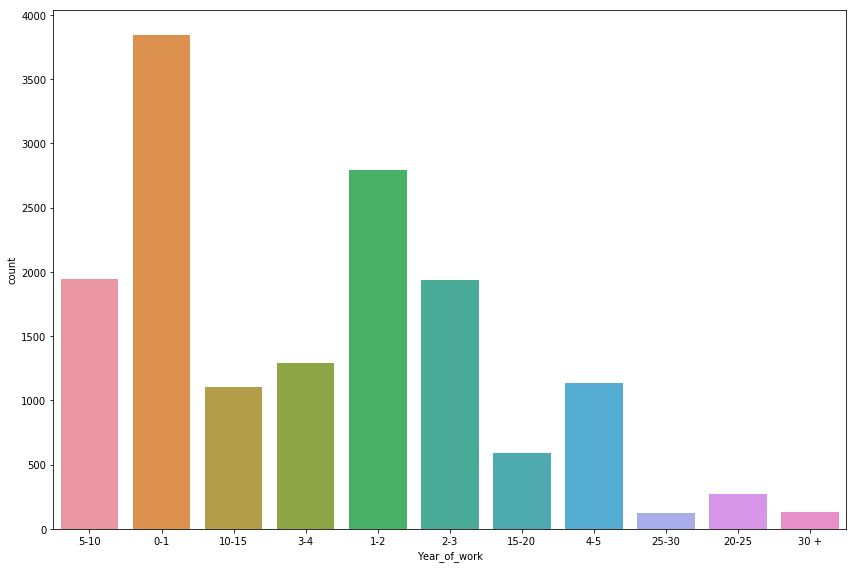

In [24]:
plt.figure(figsize=(12,8))
plt.rcParams["xtick.labelsize"] = 10
Q8_plot = sns.countplot(x='Year_of_work',data=salaryDfff)

plt.tight_layout()

In [20]:
# Set Value
salaryDfff = salaryDfff.set_value(salaryDfff['Year_of_work'].isnull(), 'Year_of_work','0-1')

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [26]:
salaryDfff[salaryDfff.Year_of_work.isnull()]

,Gender,Age,Country,Degree,Specilization,Job,Industry,Year_of_work,Salary


### Change Categorical data to Numerical data
One hot encoding is used to change the categorical data to numerical data for the further regression analysis, since the categorical data cannot be used in regression. 

In [21]:
Cat_Num_salaryDf = pd.get_dummies(salaryDfff, columns=['Gender','Age','Country','Degree','Specilization','Job','Industry','Year_of_work'], prefix=['Gender','Age','Country','Degree','Specilization','Job','Industry','Year_of_work'])

In [22]:
Cat_Num_salaryDf.shape

(15246, 143)

In [29]:
Cat_Num_salaryDf.head()

,Salary,Gender_Female,Gender_Male,Age_18-21,Age_22-24,Age_25-29,Age_30-34,Age_35-39,Age_40-44,Age_45-49,...,Year_of_work_1-2,Year_of_work_10-15,Year_of_work_15-20,Year_of_work_2-3,Year_of_work_20-25,Year_of_work_25-30,Year_of_work_3-4,Year_of_work_30 +,Year_of_work_4-5,Year_of_work_5-10
1,18668,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2726,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,682,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11957,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
5,2696,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. Exploratory Data Analysis

### a) Trends in the data 

In [24]:
salaryDfff.dtypes

Gender           object
Age              object
Country          object
Degree           object
Specilization    object
Job              object
Industry         object
Year_of_work     object
Salary            int32
dtype: object

Change the datatype of salary column into integer fot the regression model to recognize the numbric value. 

In [23]:
# Change annual compension into integer
salaryDfff['Salary'] = salaryDfff['Salary'].astype('int')

#### Data distribution by countries 
As can be seen, most of the data is from develpoed countries like the US, UK, Japan, and some euepoean sountries. Therefroe, we can say that the geolocation is importantt to the trget variable which is salssry. 

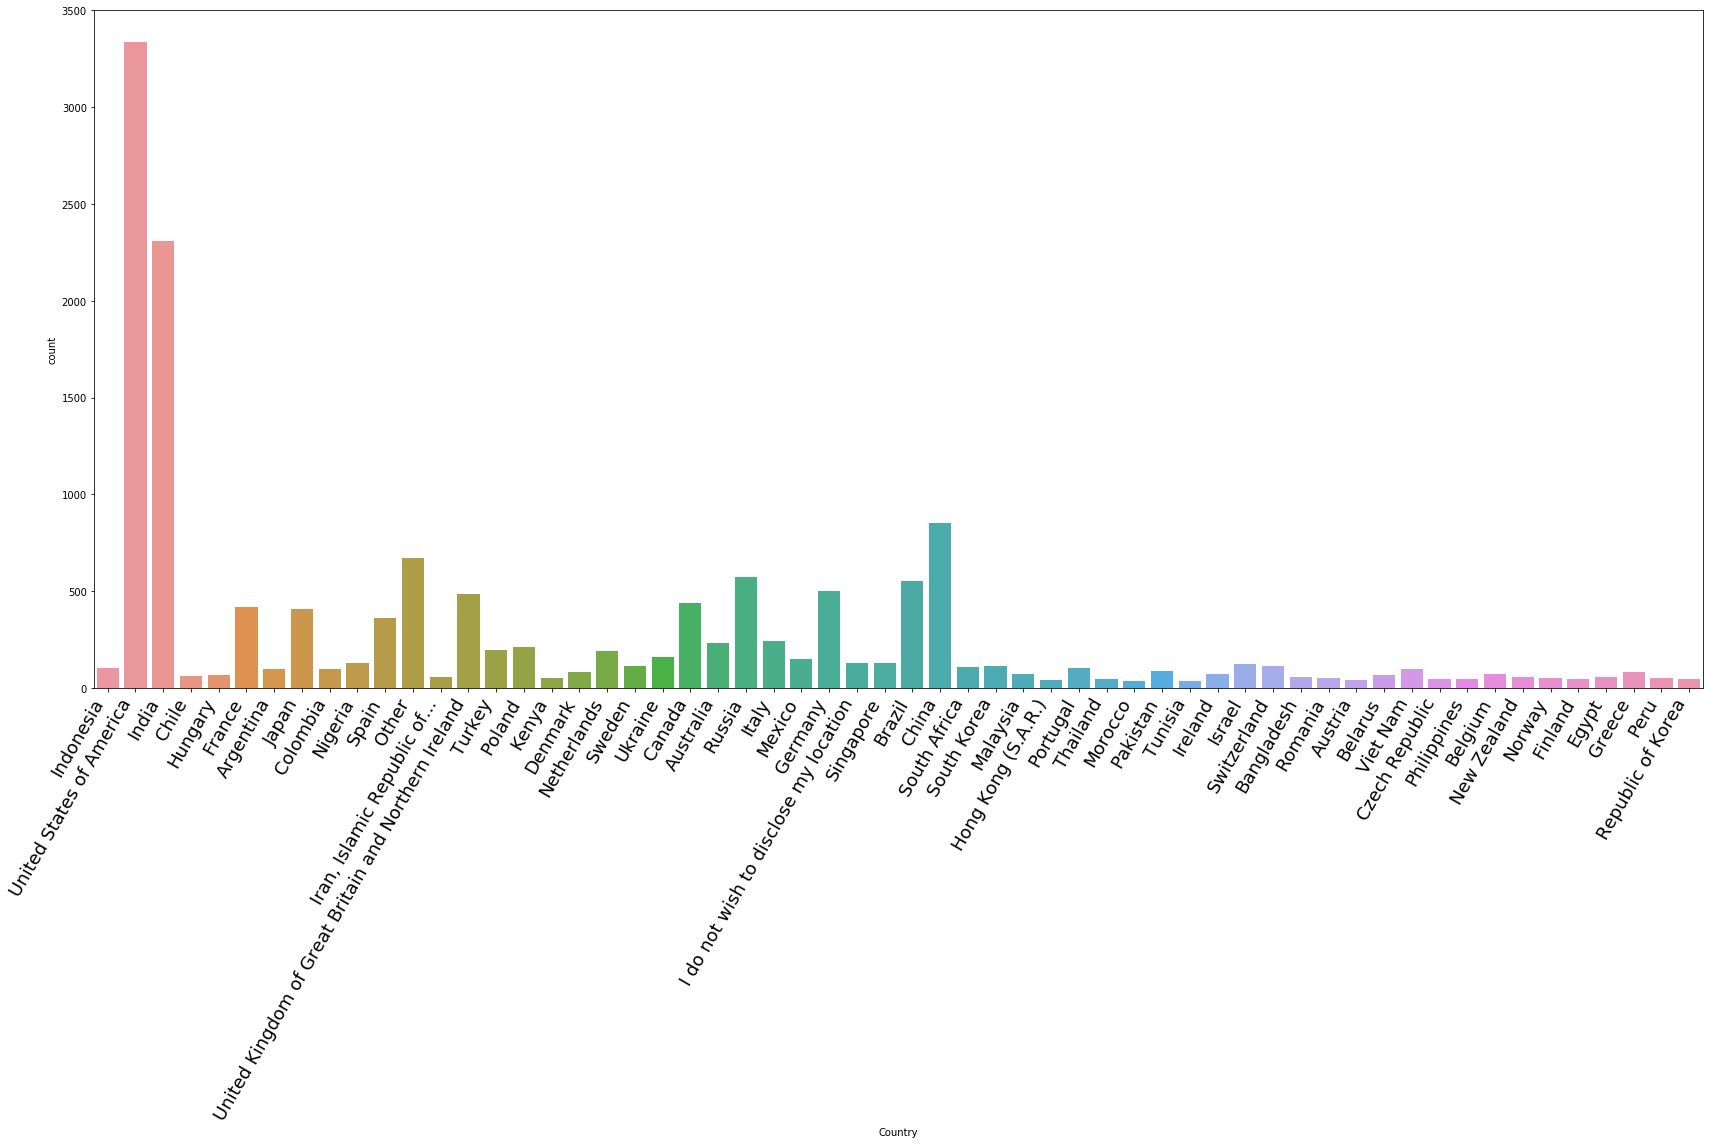

In [19]:
# Country Distribution 
plt.figure(figsize=(24,16))
plt.rcParams["xtick.labelsize"] = 18

Q3_plot = sns.countplot(x='Country',data=salaryDfff)
Q3_plot.set_xticklabels(Q3_plot.get_xticklabels(), rotation=60, ha="right")

# plt.autofmt_xdate()
# plt.rcParams["figure.figsize"] = (180, 120)

plt.tight_layout()
plt.show()

#### Histogram of distribution of frequency of salary

Text(0.5,1,'Histogram of Salary distribution')

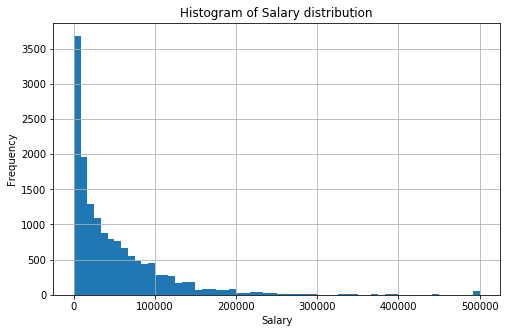

In [32]:
fig,ax = plt.subplots(figsize=(8,5))

salaryDfff['Salary'].hist(bins=60, ax=ax)

plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Histogram of Salary distribution')

#### Boxplot of Gender vs salsary 
Noting that the male's third quantile is higher than female's value. Male also has more outliers then female. 

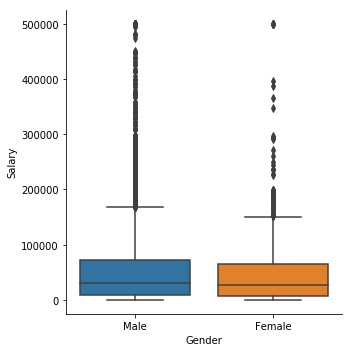

In [33]:
sns.catplot(x='Gender',y='Salary', kind="box", data=salaryDfff)

#### Boxplot of Degree vs salary distribution 
it can be noticed that the dotcal has higer salary than master and bachler degree. 

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


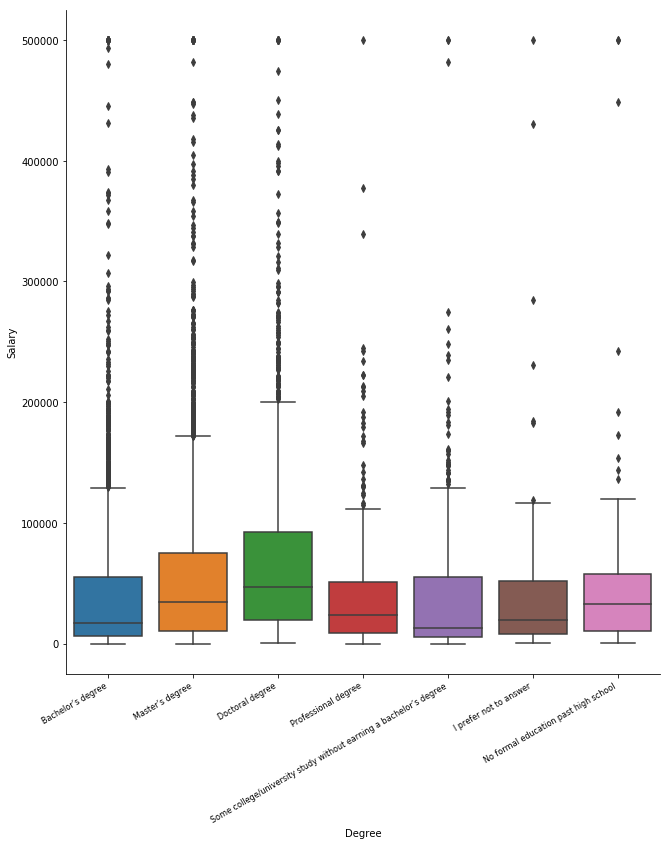

In [34]:

Degree_salary = sns.catplot(x='Degree',y='Salary', kind="box",size=10, data=salaryDfff)
Degree_salary.set_xticklabels(size= 8 ,rotation=30, ha="right")


#### Boxplot of Salary distribution on different industries
Computer industry has relative low mean but much higher outlier then ther other industres. Malitery, pharmacy, and such indystries usually earns more then the others. 

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5,1.1,'Distribution of salary in different Industries')

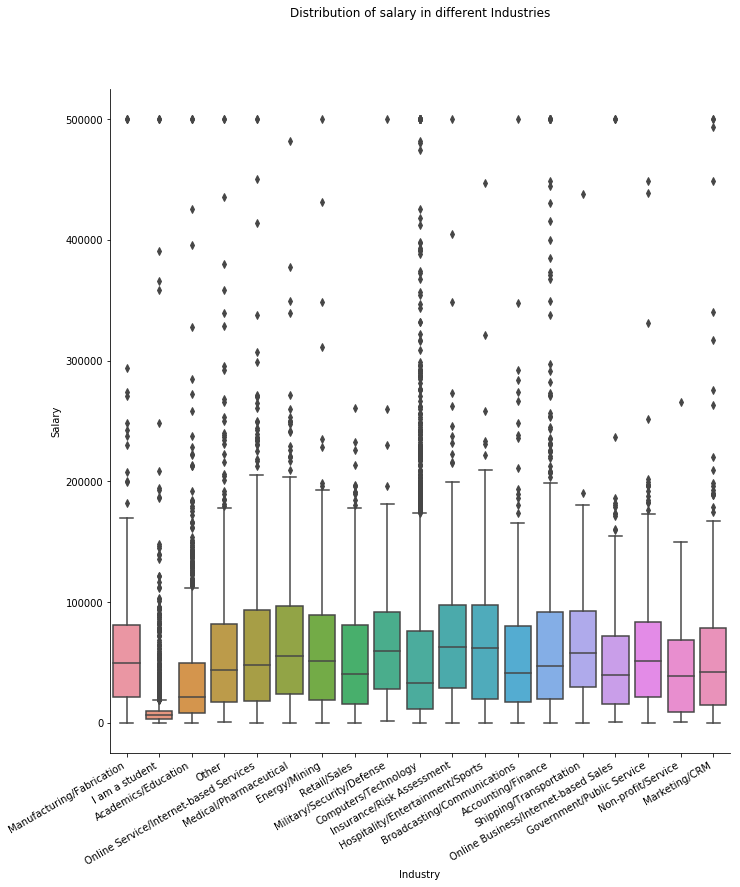

In [35]:
Degree_salary = sns.catplot(x='Industry',y='Salary', kind="box",size=10, data=salaryDfff)
Degree_salary.set_xticklabels(size= 10 ,rotation=30, ha="right")
plt.title('Distribution of salary in different Industries',y=1.1)

#### Boplot of age vs distribution of salary
As shown in the polt below, the age range from 24-40 is the largest group of the sample. 

In [36]:
# plt.figure(figsize=(40,15))
# plt.rcParams["xtick.labelsize"] = 15
# # Q5_plot.set_xticklabels(Q5_plot.get_xticklabels(), size= 20 ,rotation=30, ha="right")
# plot = sns.swarmplot(x='Age',y='Salary', hue='Gender', data=salaryDfff)

## b) Visualize importances of features 

Categrocal data us changed into numerical data to visually have an idea of the coorelation of each features. Lable encoding approach has been used in this case.

In [37]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
salaryDfff_plot = salaryDfff.copy()
salaryDfff_plot['Gender'] = labelencoder.fit_transform(salaryDfff['Gender'])
salaryDfff_plot['Age'] = labelencoder.fit_transform(salaryDfff['Age'])
salaryDfff_plot['Country'] = labelencoder.fit_transform(salaryDfff['Country'])
salaryDfff_plot['Degree'] = labelencoder.fit_transform(salaryDfff['Degree'])
salaryDfff_plot['Specilization'] = labelencoder.fit_transform(salaryDfff['Specilization'])
salaryDfff_plot['Job'] = labelencoder.fit_transform(salaryDfff['Job'])
salaryDfff_plot['Industry'] = labelencoder.fit_transform(salaryDfff['Industry'])
salaryDfff_plot['Year_of_work'] = labelencoder.fit_transform(salaryDfff['Year_of_work'])

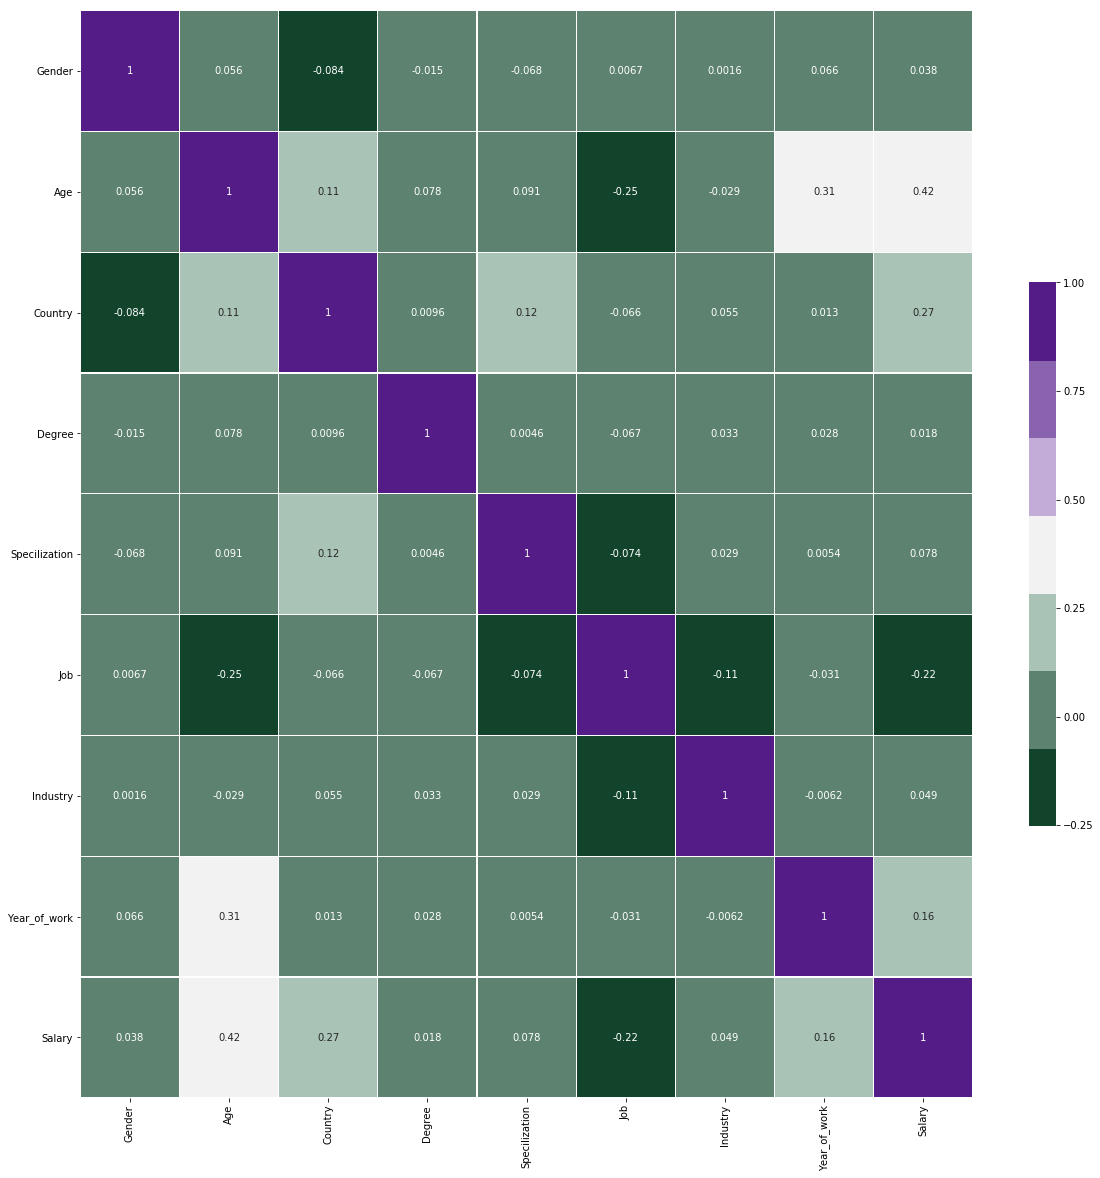

In [38]:
cmap = sns.diverging_palette(145, 280, s=85, l=25, n=7)
sns.heatmap(salaryDfff_plot.corr(),annot=True,cmap=cmap,linewidths=0.2, cbar_kws = {"shrink": .5})
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

The heatmap shown here of the correlation with different color and number on it. Therefore, the most important features affecting the salary are Gender, age, Country, and Year of work. 

# 3. Feature selection

If feature engineering is done correctly, it increases the predictive power of machine learning algorithms by creating features from raw data that help facilitate the machine learning process. A general idea has already been got in the previous step, now some sompution are done below to renk the top useful feature for the regression analysis. 

First split the data into training and testing data and then split the target variable and features.

Then use 10000 iterations to find the top 30 feature that has the ost impact on the result of testing accuracy. 

Finally the features are selected from the dataset, and the rest are get rid of. 

In [25]:
Salaries_Train,Salaries_Test = train_test_split(Cat_Num_salaryDf,test_size=0.33, random_state=13)

In [26]:
Salaries_Y = Salaries_Train['Salary']
Salaries_X = Salaries_Train.drop(['Salary'], axis=1)
Salaries_Y_Test = Salaries_Test['Salary']
Salaries_X_Test = Salaries_Test.drop(['Salary'], axis=1)

In [27]:
#set up cross validation
def run_kfold(model):
    
    X = Salaries_X
    Y = Salaries_Y
    
    kf = KFold(n_splits=10) #n_splits previously n_folds
    
    outcomes = []
    fold = 0
    
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        Y_train, Y_test = Y.values[train_index], Y.values[test_index]
        
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        
        accuracy = r2_score(Y_test, predictions) # can try mean absolute error instead
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))   
        
    mean_outcome = np.mean(outcomes)
    std_outcome=np.std(outcomes)
    print("Mean r2: {0}".format(mean_outcome)) 
    print("Standard Deviation: {0}".format(std_outcome)) 

In [42]:
model_lr = linear_model.LinearRegression()
run_kfold (model_lr)

predictions = model_lr.predict(Salaries_X_Test)
Test_Score = r2_score(Salaries_Y_Test, predictions)

print ("------------------\n Test Score: " + str(Test_Score))

Fold 1 accuracy: 0.45455460424324523
Fold 2 accuracy: 0.40516707845744604
Fold 3 accuracy: 0.46920773753847034
Fold 4 accuracy: 0.4775613255082344
Fold 5 accuracy: 0.41264963843009916
Fold 6 accuracy: 0.4492505980570469
Fold 7 accuracy: 0.42279214849954183
Fold 8 accuracy: 0.5489982204386115
Fold 9 accuracy: 0.33455290266590754
Fold 10 accuracy: 0.3236970882897142
Mean r2: 0.42984313421283177
Standard Deviation: 0.0634927479879969
------------------
 Test Score: 0.43263025059629756


In [43]:
mean_absolute_error(Salaries_Y_Test,predictions)

26149.327503974564

In [44]:
print(sorted(list(zip(model_lr.coef_, Salaries_X)))[0:10])

[(-2351096864439515.0, 'Degree_I prefer not to answer'), (-2351096864433536.0, 'Degree_Some college/university study without earning a bachelor’s degree'), (-2351096864429942.0, 'Degree_Professional degree'), (-2351096864428464.0, 'Degree_Bachelor’s degree'), (-2351096864424832.0, 'Degree_Master’s degree'), (-2351096864422639.5, 'Degree_No formal education past high school'), (-2351096864419456.0, 'Degree_Doctoral degree'), (-3723.0659770782136, 'Gender_Female'), (3709.7327861089293, 'Gender_Male'), (337796064550351.25, 'Country_Argentina')]


In [45]:
print(sorted(list(zip(model_lr.coef_, Salaries_X)),reverse=True)[0:10])

[(2.235037431761537e+17, 'Age_55-59'), (2.23503743176151e+17, 'Age_50-54'), (2.235037431761483e+17, 'Age_45-49'), (2.2350374317613933e+17, 'Age_60-69'), (2.2350374317613888e+17, 'Age_35-39'), (2.235037431761369e+17, 'Age_40-44'), (2.235037431761284e+17, 'Age_30-34'), (2.2350374317612704e+17, 'Age_18-21'), (2.2350374317612026e+17, 'Age_25-29'), (2.2350374317611926e+17, 'Age_22-24')]


In [46]:
rfe = RFE(model_lr)
fit = rfe.fit(Salaries_X[0:10000], Salaries_Y[0:10000]) 
#Sampling because of slow run time

In [47]:
a = sorted(list(zip(fit.ranking_,Salaries_X))[0:30])
a

[(1, 'Age_18-21'),
 (1, 'Age_22-24'),
 (1, 'Age_25-29'),
 (1, 'Age_30-34'),
 (1, 'Age_35-39'),
 (1, 'Age_40-44'),
 (1, 'Age_45-49'),
 (1, 'Age_50-54'),
 (1, 'Age_55-59'),
 (1, 'Age_60-69'),
 (1, 'Age_70-79'),
 (1, 'Age_80+'),
 (1, 'Country_Australia'),
 (1, 'Country_Canada'),
 (1, 'Country_Denmark'),
 (6, 'Country_Chile'),
 (8, 'Country_Austria'),
 (12, 'Country_France'),
 (13, 'Country_Belgium'),
 (14, 'Country_Finland'),
 (19, 'Country_China'),
 (21, 'Country_Colombia'),
 (22, 'Country_Bangladesh'),
 (23, 'Country_Czech Republic'),
 (33, 'Country_Brazil'),
 (40, 'Country_Belarus'),
 (42, 'Country_Egypt'),
 (49, 'Country_Argentina'),
 (71, 'Gender_Male'),
 (72, 'Gender_Female')]

Lasso regression has aslso been used to check the featreu selection, resluted the same features. 

In [48]:
reg = linear_model.Lasso(alpha = 0.5,max_iter=10000)
reg.fit(Salaries_X, Salaries_Y)
reg.score(Salaries_X, Salaries_Y)

0.44613873713507046

In [49]:
from sklearn.metrics import make_scorer, r2_score, confusion_matrix

reg_gridsearch = linear_model.Lasso(random_state=42)
#Parameters to test
parameters = {'alpha':[0.5,0,5], # Constant that multiplies the L1 term. Defaults to 1.0.
             'normalize':[True,False]} #

# Compare parameters by score of model 
acc_scorer_lm = make_scorer(r2_score)

# Run the grid search
grid_obj_lm = GridSearchCV(reg_gridsearch, parameters, scoring=acc_scorer_lm)
grid_obj_lm = grid_obj_lm.fit(Salaries_X, Salaries_Y)

reg_gridsearch = grid_obj_lm.best_estimator_  #Select best parameter combination

C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  es

In [50]:
reg_gridsearch # print out the optimal params so grid search does not need to be rerun

Lasso(alpha=5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=42,
   selection='cyclic', tol=0.0001, warm_start=False)

In [51]:
reg_gridsearch.fit(Salaries_X, Salaries_Y)
reg_gridsearch.score(Salaries_X, Salaries_Y)

0.44601174604198246

In [52]:
print('alpha (Constant that multiplies the L1 term):',grid_obj_lm.best_estimator_.alpha) 
print('normalize:',grid_obj_lm.best_estimator_.normalize)

alpha (Constant that multiplies the L1 term): 5
normalize: False


In [53]:
predictions_lasso=reg_gridsearch.predict(Salaries_X_Test)

In [54]:
mean_absolute_error(Salaries_Y_Test,predictions_lasso)

26137.49294031258

In [55]:
run_kfold (reg)

Fold 1 accuracy: 0.454528353115464
Fold 2 accuracy: 0.40571884763548705
Fold 3 accuracy: 0.4693972275645637
Fold 4 accuracy: 0.47920977708360835
Fold 5 accuracy: 0.4129151176443664
Fold 6 accuracy: 0.45120146642043246
Fold 7 accuracy: 0.4233313150147686
Fold 8 accuracy: 0.5488778305904076
Fold 9 accuracy: 0.3341643605907031
Fold 10 accuracy: 0.3251305429512539
Mean r2: 0.43044748386110554
Standard Deviation: 0.06345300142666428


In [56]:
sorted(list(zip(reg.coef_, Salaries_X)),reverse=True)[0:10]
#Can see that regularized coefficeints are more reasonable 

[(62855.39113032, 'Country_United States of America'),
 (58055.614525811194, 'Country_Switzerland'),
 (47280.507219049556, 'Job_Chief Officer'),
 (46398.64520939519, 'Country_Australia'),
 (42759.438158349934, 'Year_of_work_30 +'),
 (39281.12494191901, 'Country_Israel'),
 (36893.51378498104, 'Country_Denmark'),
 (36541.49330436911, 'Country_Hong Kong (S.A.R.)'),
 (32584.089426210096, 'Job_Data Journalist'),
 (30789.190899905723, 'Country_Canada')]

In [57]:
rfe_lasso = RFE(reg)
fit_lasso = rfe_lasso.fit(Salaries_X[0:10000], Salaries_Y[0:10000]) #Sampling because of slow run time

In [61]:
sorted(list(zip(model_lr.coef_, Salaries_X))[0:30])

[(-36200.68361936036, 'Country_Egypt'),
 (-27732.46426917248, 'Country_Denmark'),
 (-26300.760410985968, 'Country_Colombia'),
 (-24809.2122330444, 'Country_Chile'),
 (-22350.653594135754, 'Country_Czech Republic'),
 (-22261.86569311334, 'Country_Australia'),
 (-20549.518941574068, 'Country_Canada'),
 (-18476.047673057772, 'Country_Brazil'),
 (-18461.79495135506, 'Country_China'),
 (-9695.731772204992, 'Country_Belgium'),
 (-9109.33596662608, 'Country_Belarus'),
 (-8665.62617553864, 'Country_Austria'),
 (-5871.398551833212, 'Country_Bangladesh'),
 (-1947.3480210811513, 'Country_France'),
 (1935.7837360588078, 'Country_Finland'),
 (9210.655872205121, 'Age_80+'),
 (12425.294173903723, 'Country_Argentina'),
 (23549.86524116117, 'Age_70-79'),
 (1.3968364133215482e+16, 'Gender_Female'),
 (1.3968364133225082e+16, 'Gender_Male'),
 (1.3968364133242142e+16, 'Age_18-21'),
 (1.396836413326009e+16, 'Age_22-24'),
 (1.3968364133273878e+16, 'Age_60-69'),
 (1.3968364133274646e+16, 'Age_30-34'),
 (1.396

In [ ]:
# b=[]
# for i in range(len(a)):
#     c=a[i][1]
#     b.append(c)
# b

# 4. Model Impletation

In [28]:
selectedDF_train = Salaries_Train[['Salary','Age_18-21',
 'Age_22-24',
 'Age_25-29',
 'Age_30-34',
 'Age_35-39',
 'Age_40-44',
 'Age_45-49',
 'Age_50-54',
 'Age_55-59',
 'Age_60-69',
 'Age_70-79',
 'Age_80+',
 'Country_Australia',
 'Country_Canada',
 'Country_Denmark',
 'Country_Chile',
 'Country_Austria',
 'Country_France',
 'Country_Belgium',
 'Country_Finland',
 'Country_China',
 'Country_Colombia',
 'Country_Bangladesh',
 'Country_Czech Republic',
 'Country_Brazil',
 'Country_Belarus',
 'Country_Egypt',
 'Country_Argentina',
 'Gender_Male',
 'Gender_Female']]

selectedDF_test = Salaries_Test[['Salary','Age_18-21',
 'Age_22-24',
 'Age_25-29',
 'Age_30-34',
 'Age_35-39',
 'Age_40-44',
 'Age_45-49',
 'Age_50-54',
 'Age_55-59',
 'Age_60-69',
 'Age_70-79',
 'Age_80+',
 'Country_Australia',
 'Country_Canada',
 'Country_Denmark',
 'Country_Chile',
 'Country_Austria',
 'Country_France',
 'Country_Belgium',
 'Country_Finland',
 'Country_China',
 'Country_Colombia',
 'Country_Bangladesh',
 'Country_Czech Republic',
 'Country_Brazil',
 'Country_Belarus',
 'Country_Egypt',
 'Country_Argentina',
 'Gender_Male',
 'Gender_Female']]

Salaries_Y2 = selectedDF_train['Salary']
Salaries_X2 = selectedDF_train.drop(['Salary'], axis=1)
Salaries_Y2_Test = selectedDF_test['Salary']
Salaries_X2_Test = selectedDF_test.drop(['Salary'], axis=1)

 ### Following Algorithms are used for modeling 
1. Linear Regression
2. kNN Regression
3. RandomForest Regression
4. XGBoost, DecisionTreeClassifier

Following k_flods crossvalidiation is used to make the trained data more random and alike the test data to provent overfitting by training data that happens to be similar to the testing data. 

In [29]:
def run_kfold(model):
    
    X = Salaries_X2
    Y = Salaries_Y2
    
    kf = KFold(n_splits=10) #n_splits previously n_folds
    
    outcomes = []
    fold = 0
    
    for train_index, test_index in kf.split(X):
        fold += 1
        X_train, X_test = X.values[train_index], X.values[test_index]
        Y_train, Y_test = Y.values[train_index], Y.values[test_index]
        
        model.fit(X_train, Y_train)
        predictions = model.predict(X_test)
        
        accuracy = r2_score(Y_test, predictions) # can try mean absolute error instead
        outcomes.append(accuracy)
        print("Fold {0} accuracy: {1}".format(fold, accuracy))   
        
    mean_outcome = np.mean(outcomes)
    std_outcome=np.std(outcomes)
    print("Mean r2: {0}".format(mean_outcome)) 
    print("Standard Deviation: {0}".format(std_outcome)) 

In [30]:
def bias(y_predict,y):
    y_predict = np.array(y_predict)
    y = np.array(y)
    return np.mean(np.power((y_predict-y),2))

def variance(y_predict):
    y_predict = np.array(y_predict)
    return np.var(y_predict)

#### 1) Linear regression 
Linear regression is a suprvised machine learning algorithm trying to fit all the data into a line by findin the coefficient of the line. With more data given, the accuracy of the model would improve. 

Pros: 1. Simple and easy to explain to people
      2. Coedfficient could provide us inofrmation on the model
      3. Fast therefore cheap to compute 
      
Cons: 1. Only numerical data can be implemented by this approach 
      2. The predicted variable can only be continous 
      3. Prediction would be poor for nonlinear model 
      
Choose this approcah since this ease of use. 

In [31]:
model_lr = linear_model.LinearRegression()
run_kfold (model_lr)
predictions = model_lr.predict(Salaries_X2_Test)
Test_Score = r2_score(Salaries_Y2_Test, predictions)
print ("------------------\n Test Score: " + str(Test_Score))

Fold 1 accuracy: 0.2140558474097779
Fold 2 accuracy: 0.18074266381394588
Fold 3 accuracy: 0.2063082577997153
Fold 4 accuracy: 0.20240639958516216
Fold 5 accuracy: 0.17946905640418065
Fold 6 accuracy: 0.20188090140155135
Fold 7 accuracy: 0.1653797321722622
Fold 8 accuracy: 0.2836819030430954
Fold 9 accuracy: 0.17525925328477865
Fold 10 accuracy: 0.15779552378131811
Mean r2: 0.19669795386957872
Standard Deviation: 0.03394785010816136
------------------
 Test Score: 0.19999109643374113


In [32]:
# linear regression Bias & Variance 
linear_bias = bias(pd.to_numeric(predictions), pd.to_numeric(Salaries_Y2_Test))
linear_var = variance(pd.to_numeric(predictions))
linear_bias, linear_var

(3003772186.5961843, 777444000.800885)

#### 2)  Random Forest
Random Forest is an ensemble method for classification. The model employs numbers of decision trees and each decision tree has a vote. 

Pros: 1. Reduce correlation between trees
      2. Random sample of features are used as random subsets of the original            data
       
Cons: 1. Black Box inside, hard to understand  
      2. Longer operation time for larger features 
      
Chose this method sicne the effect on correlation of tree could be negelected in this case. 

In [34]:
rf = RandomForestClassifier()
run_kfold (rf)
predictions = model_lr.predict(Salaries_X2_Test)
Test_Score = r2_score(Salaries_Y2_Test, pd.to_numeric(predictions))
print ("------------------\n Test Score: " + str(Test_Score))

Fold 1 accuracy: -7.405468050760549
Fold 2 accuracy: -0.973092383509315
Fold 3 accuracy: -19.43409216299564
Fold 4 accuracy: -8.684302863443492
Fold 5 accuracy: -11.429396159807467
Fold 6 accuracy: -5.512262571770183
Fold 7 accuracy: -5.04252187683993
Fold 8 accuracy: -8.90711781391091
Fold 9 accuracy: -6.620227828028368
Fold 10 accuracy: -9.512936226036084
Mean r2: -8.352141793710194
Standard Deviation: 4.597928629741706
------------------
 Test Score: 0.19999109643374113


In [35]:
# random forest regression bias asn variance analysis 
rf_bias = bias(pd.to_numeric(predictions), pd.to_numeric(Salaries_Y2_Test))
rf_var = variance(pd.to_numeric(predictions))
rf_bias, rf_var

(3003772186.5961843, 777444000.800885)

#### 3) DecisionTree 
kNN a supervised learning algorithm taking input consists of the k closest training samples in the feature space and outputs an label classified by a majority vote of its neighbors. 

Pros: 1. Ability of selecting the most discriminatory features.
      2. Data classification without much calculations
      3. Handling both continuous and discrete data with proper algorith chosen
      4. Comprehensive enough to handle Rule Generation problem
       
Cons: 1. Classfiation error could be high for small training set 
      2. Discrete data is needed for construct the algorithm 
      3. Calculation grows exponentially when the tree grows
Choose this approach sicne its ability of selecting the most discriminatory features

In [86]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
regr = DecisionTreeRegressor(max_depth=5)
run_kfold (regr)
predictions = model_lr.predict(Salaries_X2_Test)
Test_Score = r2_score(Salaries_Y2_Test, predictions)
print ("------------------\n Test Score: " + str(Test_Score))

Fold 1 accuracy: 0.19178723195619785
Fold 2 accuracy: 0.1547037584390174
Fold 3 accuracy: 0.16810319335516877
Fold 4 accuracy: 0.17534570840228192
Fold 5 accuracy: 0.1505521437590427
Fold 6 accuracy: 0.18131822716937607
Fold 7 accuracy: 0.15483618517495223
Fold 8 accuracy: 0.2500331129226512
Fold 9 accuracy: 0.15245740238678862
Fold 10 accuracy: 0.14805586749096056
Mean r2: 0.17271928310564372
Standard Deviation: 0.029321898736689715
------------------
 Test Score: 0.19999109643374113


In [87]:
# Decision Tree regression bias asn variance analysis 
dt_bias = bias(pd.to_numeric(predictions), pd.to_numeric(Salaries_Y2_Test))
dt_var = variance(pd.to_numeric(predictions))
dt_bias, dt_var

(3003772186.5961843, 777444000.800885)

#### 4) Ridge regression
l2 regularized linear regression, by tuning the hypermater the performance of the model could improve.

Pros: 1. Simple and easy to explain to people
      2. Coedfficient could provide us inofrmation on the model
      3. Fast therefore cheap to compute 
      
Cons: 1. Only numerical data can be implemented by this approach 
      2. The predicted variable can only be continous 
      3. Prediction would be poor for nonlinear model 
I chose the algorithm due to the its ease on hyperparameter tuning.

In [90]:
# Ridge regression
np.random.seed(1)
m2 = linear_model.Ridge(alpha=0.1,random_state=1)
run_kfold (m2)
predictions = model_lr.predict(Salaries_X2_Test)
Test_Score = r2_score(Salaries_Y2_Test, predictions)
print ("------------------\n Test Score: " + str(Test_Score))

Fold 1 accuracy: 0.21407068520758554
Fold 2 accuracy: 0.1809195704695491
Fold 3 accuracy: 0.2063837589494495
Fold 4 accuracy: 0.20241597949771561
Fold 5 accuracy: 0.1808630398217621
Fold 6 accuracy: 0.20231552519871054
Fold 7 accuracy: 0.16553946604591363
Fold 8 accuracy: 0.2835596760036232
Fold 9 accuracy: 0.1756104535880274
Fold 10 accuracy: 0.15788789357558064
Mean r2: 0.19695660483579172
Standard Deviation: 0.033801813568215835
------------------
 Test Score: 0.19999109643374113


In [91]:
# Ridge regression regression bias asn variance analysis 
rg_bias = bias(pd.to_numeric(predictions), pd.to_numeric(Salaries_Y2_Test))
rg_var = variance(pd.to_numeric(predictions))
rg_bias, rg_var

(3003772186.5961843, 777444000.800885)

## 5. Model Tuning

### Decision Tree Hyperparameter Tuning 

In [52]:
from sklearn.tree import DecisionTreeRegressor
# Create instance of a DecisionTreeRegressor
model_dtr = DecisionTreeRegressor(random_state=42)
model_dtr

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [54]:
# Create instance of a DecisionTreeRegressor
model_dtr = DecisionTreeRegressor(random_state=42)
# Perform gridsearch to determine optimal parameters
# Grid search
param_dist = { 
        "max_depth"      : [5, 10, 15, 20, 25],
        "max_features"      : ["sqrt", "log2", None],
        "min_samples_leaf" : [2, 4, 8, 10, 12, 14]
        }
cv_RF_reg = GridSearchCV(model_dtr, cv = 5, param_grid=param_dist)
cv_RF_reg.fit(Salaries_X2, Salaries_Y2)
print(cv_RF_reg.best_params_)

{'max_depth': 10, 'max_features': None, 'min_samples_leaf': 10}


In [55]:
model_dtr.set_params(max_depth= 45, 
                   max_features= None, 
                   min_samples_leaf= 8)
model_dtr.fit(Salaries_X,Salaries_Y)

DecisionTreeRegressor(criterion='mse', max_depth=45, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [ ]:
print('Accuracy of on Train set: {:.3f}'.format(model_dtr.score(Salaries_X2, Salaries_Y2)))
print('Accuracy of on Test set: {:.3f}'.format(model_dtr.score(Salaries_X2_Test, Salaries_Y2_Test)))

### Random Forest Hyperparameter Tuning 

In [39]:
model_rr = linear_model.Ridge(random_state=1)
param_rr = {'alpha': [0.1, 100, 1000, 10000],
             }
cv_rr = GridSearchCV(estimator=model_rr, param_grid=param_rr)
cv_rr.fit(Salaries_X2, Salaries_Y2)
print(cv_RF_rr.best_params_)

{'alpha': 0.1}


In [44]:
model_rr.set_params(alpha= 0.1)
model_rr.fit(Salaries_X2_Test,Salaries_Y2_Test)
print('Accuracy of on Train set: {:.3f}'.format(model_rr.score(Salaries_X2, Salaries_Y2)))
print('Accuracy of on Test set: {:.3f}'.format(model_rr.score(Salaries_X2_Test, Salaries_Y2_Test)))

Accuracy of on Train set: 0.198
Accuracy of on Test set: 0.204


Therefore, the best alpha found for random forest is 0.1, 
and the results is givne by 
Accuracy of on Train set: 0.198
Accuracy of on Test set: 0.204

Comparing with the untunned accuracy, it improved a little bit. 

# Q6. Testing and Discussion

Random forest shown above have the higest perfrmacen, with the accuracy of 
Accuracy of on Train set: 0.198
Accuracy of on Test set: 0.204. 

The training set has higher accuracy than the testign data, which is expected. ALthought the overall perforamnce is the model is not that ggod, the accuracy match the taesing ste well with not much overfitting. 

more tuning on the model or the better selection of model could help increase the performance of the model. 

I believe we have underfitting in this case, sicne usually the testing performanc is higer . 